# Practicals for lecture 1.3

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vigji/python-cimec-2024/blob/main/practicals/Practicals_1.3.ipynb)

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

#### 1.3.0

In [1]:
# Create a dataframe from the following info about subject in an experiment:
np.random.seed(42)
n_subjects = 100
subjects_data_dictionary = {
    'age': np.random.randint(20, 40, n_subjects),
    'weight': np.random.randint(50, 100, n_subjects),
    'height': np.random.randint(150, 200, n_subjects),
    'sex': np.random.choice(['M', 'F'], n_subjects),
    'handedness': np.random.choice(['R', 'L'], n_subjects),
    'group': np.random.choice(['control', 'patient'], n_subjects)}


NameError: name 'np' is not defined

In [ ]:
# We can calculate the BMI as :
# (body weight in kgs) /  ( (height in meters) ** 2) 

# Define a new column where you compute the BMI for every subject:


In [ ]:
string_data = ['cabbage', 'artichoke', 'banana', 'avocado', 'apple', 'orange']
int_data = [1, 2, 3, 4, 5, 6]
float_data = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]

# organize the data above in a dictionary and from it define a new DataFrame:


In [ ]:
# Now, reorganize the data in a list of dictionaries 
# (one for every row: {string_data: 'cabbage', int_data: 1, float_data: 0.1}, etc. Do it using a for loop, and ideally use zip) 
# and from it define a new DataFrame:



In [ ]:
# Extend the subject dataset above adding two subjects for which you have the following info:
# (Hint: start by defining a new dataframe, and then concatenate it)

new_subject1 = {'age': 25,
    'weight': 78,
    'height': 170,
    'sex': "M",
    'handedness': "R",
    'group': "patient"}
new_subject2 = {'age': 35,
    'weight': 65,
    'height': 165,
    'sex': "F",
    'handedness': "R",
    'group': "control"}

# Make sure the new dataset has univoque indexing! (no two rows should have the same index)


In [ ]:
# [Advanced]
# In the above exercise, we're 'adding new rows" to our dataframe with pd.concat.
# Is this process truly modifying the original subjects_df object or are we creating a new object in memory? Write down your guess then verify it using python's "is" keyword.
# (as in "df_a is df_b"; will return True if df_a and df_b are the same object in memory)

# Based on this information, would it be efficient to add a large number of subjects to a dataframe in a for loop using pd.concat?


In [ ]:
# Iteratively growing a dataframe
# write 4 different functions for iteratively adding subject numbers (from 1 to 100) row by row to an empty dataframe
# to be clear, the final output is a dataframe with column name "subject" and 100 rows [0,1,2,...100] - very simple output but we want to know which approach is most efficient


def append_with_concat():
  df = pd.DataFrame(columns = ['subject']) # create an empty dataframe with only the column name
  for subject_num in range(100):
     ...
    #create a dataframe to store subject_num (i.e. 1 row), and add it to df using pd.concat"

def collect_dfs_then_concat():
  list_of_dfs = []
  for subject_num in range(100):
     ...
    #create a dataframe to store subject_num (i.e. 1 row) then add this dataframe to the list_of_dfs
  #outside the for loop, combine all the dfs from the list_of_dfs as well as the empty one into a single df with pd.concat

def append_to_list_then_convert_to_df():
  list_of_subject_nums = []
  for subject_num in range(100):
     ...
    #append to the list
  #outside the for loop, convert the list to a df

def preallocate_numpy_array():
    array = np.zeros((100, 1))
    for subject_num in range(100):
       ...
        #replace the zeros in the array with the subject_num
    #outside the for loop, convert the array into a df

In [ ]:
# let's compare how fast each option is!
%timeit append_with_concat()
%timeit collect_dfs_then_concat()
%timeit append_to_list_then_convert_to_df()
%timeit preallocate_numpy_array()
# the example was ridiculously simple (100 rows and 1 column) so if you're working with a larger dataset you'll feel the difference between these even more
# in general, you should really avoid appending to a dataframe. If you need to iteratively construct a data container, work with lists, arrays or dicts then only convert to
# dataframes at the end for extracting info from your final dataframe

#### 1.3.1 Methods of `pandas` dataframes

In [ ]:
# Here we create a fake dataframe containing the results of a psychological test with 30 subjects.
# Subjects can be left-handed or right-handed.
# The test has 2 measures (reaction time - RT, and accuracy)
def create_data_df():
    np.random.seed(42)
    subject_ability = np.random.uniform(0, 1, 30)
    return pd.DataFrame({'subject': [f"subject_{i}" for i in range(30)],
                       'handedness': np.random.choice(['left', 'right'], 30),
                       'RT': subject_ability*100 + np.random.uniform(0, 50, 30),
                       'accuracy': subject_ability + np.random.normal(0.8, 0.1, 30)})
df = create_data_df()
df.head()

In [ ]:
# sort the dataframe by RT:


In [ ]:
# Compute the mean and standard deviation of the RT and accuracy across the dataset:


In [ ]:
# Use indexing to select the RT of the left-handed subjects, and compute its 90% percentile:


In [ ]:
# Now use the percentile to select the accuracy for left-handed subjects with RT above the 90% percentile:


In [ ]:
# Create a scatter plot of RT vs accuracy for the right-handed subjects:


In [20]:
# Take the meteo dataset using the function below
def get_meteo_dataset():
    """Get the meteo dataset from the open-meteo API.
    Note how easy it is to get data from the web with pandas! As long as we give the URL of the csv data, pandas can read it.
    """
    np.random.seed(42)
    URL = "https://api.open-meteo.com/v1/forecast?latitude=52.52&longitude=13.41&current=temperature_2m,wind_speed_10m&hourly=temperature_2m,relative_humidity_2m,precipitation,wind_speed_10m,winddirection_10m&start_date=2025-03-01&end_date=2025-04-20&format=csv"
    df = pd.read_csv(URL, skiprows=6)  # read the csv file, skipping the first 3 rows (a header)
    df.columns = [col.split(" ")[0] for col in df.columns]  # simplify column names
    df["time"] = pd.to_datetime(df["time"])  # convert the time column to datetime
    df["hour"], df["dayofyear"] = df["time"].dt.hour, df["time"].dt.dayofyear  # extract the hour and day of year
    df["weekdays"] = df["time"].dt.day_name()  # extract the day of the week

    # Here we artificially corrupt some of the data to make it more interesting
    missing_idx = np.random.choice(df.index[:1000], 100)
    df.loc[missing_idx, :] = np.nan
    return df

meteo_df = get_meteo_dataset()

In [21]:
meteo_df#[meteo_df["time"].isna()]#.loc[:1000, "temperature_2m"]

,time,temperature_2m,relative_humidity_2m,precipitation,wind_speed_10m,winddirection_10m,hour,dayofyear,weekdays
0,2025-03-01 00:00:00,3.6,86.0,0.0,11.9,2.0,0.0,60.0,Saturday
1,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-03-01 02:00:00,3.4,84.0,0.0,11.2,360.0,2.0,60.0,Saturday
3,2025-03-01 03:00:00,3.6,85.0,0.0,7.8,13.0,3.0,60.0,Saturday
4,2025-03-01 04:00:00,3.5,87.0,0.0,7.9,344.0,4.0,60.0,Saturday
...,...,...,...,...,...,...,...,...,...
1219,2025-04-20 19:00:00,17.6,51.0,0.0,5.2,25.0,19.0,110.0,Sunday
1220,2025-04-20 20:00:00,16.4,57.0,0.0,3.6,53.0,20.0,110.0,Sunday
1221,2025-04-20 21:00:00,15.5,74.0,0.0,3.2,90.0,21.0,110.0,Sunday
1222,2025-04-20 22:00:00,14.8,75.0,0.0,2.9,97.0,22.0,110.0,Sunday


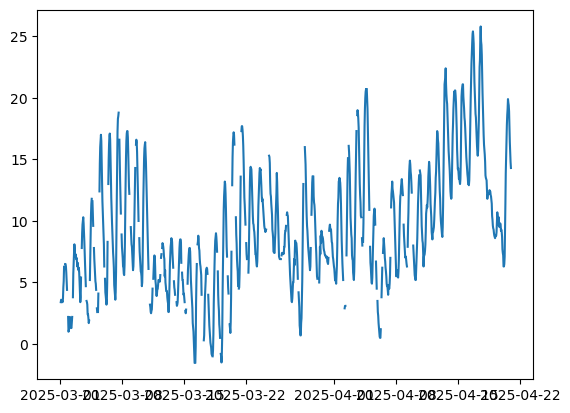

In [23]:
# Plot the temperature and relative humidity for the first 1000 time points. 
# Find points where there's missing data (interrupted line).
plt.plot(meteo_df["time"], meteo_df["temperature_2m"])


In [6]:
# Create a new interpolated temperature column by interpolating the temperature column of the dataframe:



In [ ]:
# Make a new plot with the interpolated temperature and the non-interpolated temperature 
# (plot the interpolated first!)


#### 1.3.2 Organize a dataframe

In [ ]:
# Let's have a look into how to organize data in a dataframe.

# Use the following function that generates results for many subjects on
# an experiment with experimental trials of different difficulty levels.

def get_experiment_block_data(n_subjects=50, difficulty_levels=(1, 2, 3, 4, 5), n_repetitions=50):
    """Generate a dataframe with results from an experiment with experimental blocks.

    Parameters
    ----------
    n_reps : int
        Number of experimental blocks.
    n_subjects : int
        Number of subjects.
    difficulty_levels : tuple
        Difficulty levels of the experimental blocks.

    Returns
    -------
    dict
        A dictionary with the results of the experiment for each subject.


    """


    np.random.seed(42)
    subject_dict = dict()
    for subject in range(n_subjects):
        subject_ability = np.random.randint(1, 6)
        difficulty_level_arr = np.random.choice(difficulty_levels, size=n_repetitions)
        rt = np.random.normal(1000, 100, size=n_repetitions) * difficulty_level_arr / subject_ability
        error = np.random.uniform(0, 1000*difficulty_level_arr / subject_ability, size=n_repetitions)

        subject_dict[f"subject_{subject}"] = dict(
            difficulty_level=difficulty_level_arr,
            rt=rt,
            error=error,
        )

    return subject_dict


# Run the function to generate the data dictionary.
# Every entry of the dictionary (a subject) contains arrays 
# for the trial difficulty level, reaction time, and error:
data = get_experiment_block_data()

# Convert the nested data to a (flat) dataframe:

In [ ]:
# Select the data for subject 0, and create a scatter plot with the reaction time as a function of the trial difficulty level:


In [24]:
# Load the subjects dataframe from the csv file at the url:
# https://raw.githubusercontent.com/vigji/python-cimec/main/practicals/data/subjects_df.csv

subject_df = pd.read_csv("https://raw.githubusercontent.com/vigji/python-cimec/main/practicals/data/subjects_df.csv",
                         index_col=0)
subject_df.head()

,sex,handedness,age
subject_0,F,left,37
subject_1,M,right,31
subject_2,F,left,21
subject_3,F,right,29
subject_4,F,left,23


In [ ]:
# Now use boolean indexing on the subject dataframe to include only left-handed males 
# above 30 years in the analysis.
# Plot the reaction time as a function of the trial difficulty level for this subpopulation:
